In [1]:
import numpy as np
import lDGA.config as cfg
import lDGA.dmft_reader as dmft_reader
import lDGA.bse as bse
import lDGA.utilities as util
import matplotlib.pyplot as plt

### load dmft data

In [2]:
# example file
dmft_file = "b53_u2_4_2part-2022-11-19-Sat-07-10-47.hdf5"

dga_cfg = cfg.DGA_Config(dmft_file)
reader = dmft_reader.DMFT_Reader(dga_cfg)

beta = dga_cfg.dmft_dict['beta']
mu = dga_cfg.dmft_dict['mu']
U = dga_cfg.dmft_dict['U']
g = dga_cfg.dmft_dict['giw']
s = dga_cfg.dmft_dict['siw']
g2 = dga_cfg.dmft_dict['chi_ph']
niwf = dga_cfg.niwf
n4iwf = dga_cfg.n4iwf
n4iwb = dga_cfg.n4iwb
kdim = dga_cfg.kdim
nk = 96

### calculate lattice chi_q

In [3]:
chi0_w = bse.chi0_loc_w(beta, g, n4iwf, n4iwb)

# kgrid has to be initialized beforehand
kpoints = np.linspace(-np.pi,np.pi,96,endpoint=False)
k_grid = np.meshgrid(kpoints,kpoints)
k_grid = np.array(k_grid).reshape(2,-1).T

chi0_q_w = bse.chi0_q_w(beta, mu, s, k_grid, kdim, 96, np.array([[0.,0.]]), niwf, n4iwf, n4iwb)
print(chi0_q_w.shape)

u = U*np.ones([2*n4iwb+1], dtype=np.float64)
data = bse.chi_v_r_q_w(beta, u, chi0_w, chi0_q_w, g2, n4iwf, n4iwb, qpoints=np.array([[0.,0.]]), nk=96)

(260, 11, 1)


/Users/eminmoghadas/anaconda3/envs/dga_dev/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/eminmoghadas/anaconda3/envs/dga_dev/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


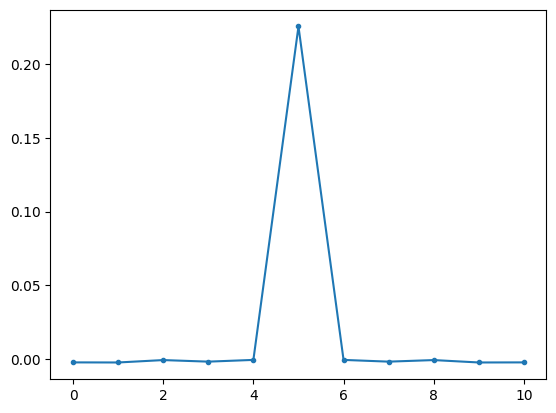

In [4]:
import matplotlib.pyplot as plt

chi = data[0]

plt.plot(chi, ".-")


In [7]:
F_d, F_m = bse.F_r_loc(beta, chi0_w, g2, n4iwf, n4iwb)

/Users/eminmoghadas/anaconda3/envs/dga_dev/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/eminmoghadas/anaconda3/envs/dga_dev/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


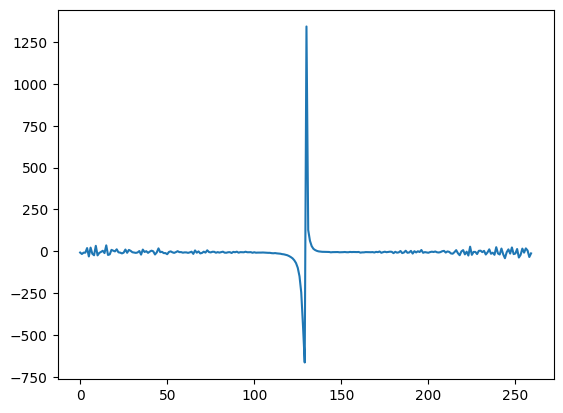

In [9]:
F_uu = 0.5*(F_d-F_m)

plt.plot(F_d[:,130,5])

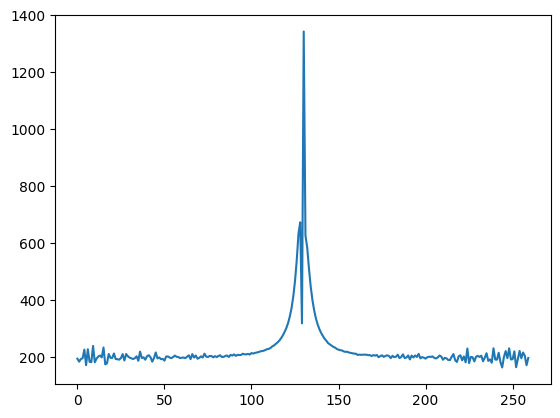

In [11]:
plt.plot(F_uu[130,:,5])